# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-danger">

<b>Comentário geral v1: </b> <a class="tocSkip"></a>
    
   
Parabéns pela conclusão do projeto, Maria Sofia! Seu projeto já está com uma qualidade excelente! Como pontos positivos, destaco:

- Código estruturado e eficiente
- Comentários que enriquecem a análise

Para prosseguirmos com a aprovação, precisamos realizar o filtro temporal para atender o seguinte requisito do projeto:
    
`Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.`
    
    
A sua análise de dados atualmente abrange todo o período temporal. Precisamos selecionar quais serão os melhores anos para nossa análise.

    
Dica: É raro utilizar dados de mais de 2-3 anos para prever as vendas do próximo ano, mesmo em negócios tradicionais. Na indústria dinâmica de jogos de computador, evitar períodos mais longos é ainda mais importante, pois você pode acabar rastreando tendências obsoletas. No entanto, também não é aconselhável usar um período muito curto. **O ideal seria usar um intervalo de 2-3 anos, como 2014-2016, 2015-2016 ou 2013-2016.**
    
    
Adicionei comentários para te ajudar na solução.

Estou à disposição para qualquer dúvida que você tiver! 

Boa sorte! 🍀
</div>    

<div class="alert alert-block alert-success">

<b>Comentário geral v2: </b> <a class="tocSkip"></a>
    
   
Muito obrigada pelos ajustes! O projeto está aprovado!
</div>    

# Análise da popularidade de jogos vendidos pela Ice

* Nome: Maria Sofia
* Data: 25/11/2024

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Abra o arquivo de dados e estude as informações gerais

### Lendo os dados

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head() #Verificando os dados

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Informações gerais

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* 'Year_of_Release' possui valores faltantes e tipo de ddos 'float' em vez de 'int'. Irei investigar posteriormente
* 'User_Score' deveria ser do tipo 'float', mas é 'object'.
* Os nomes das colunas não seguem um padrão.

## Prepare os dados

### Substituir os nomes das colunas (transformar tudo em minúsculos).

In [5]:
[col.lower() for col in df.columns]

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [6]:
df.columns = [col.lower() for col in df.columns]

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Converta os dados para os tipos necessários.

#### Tratando a coluna 'user_score'

In [8]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [9]:
df['user_score'] = df['user_score'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


A coluna 'user_score' era do tipo 'object' porque existiam strinngs 'tbd' nessa coluna. Portanto, foi substituido por 'NAN' para a alteração do tipo de dados dessa coluna.

#### Tratando a coluna 'year_of_release'

In [11]:
qtd_valores_faltantes = df['year_of_release'].isna().sum()
qtd_exemplos = df.shape[0]

print(f'A base de dados tem {qtd_exemplos} linhas e {qtd_valores_faltantes} delas possuem valores ausentes')
print(f'Como os valores ausentes representam apenas {qtd_valores_faltantes/qtd_exemplos:.2%} dos dados, irei removê-los.')

A base de dados tem 16715 linhas e 269 delas possuem valores ausentes
Como os valores ausentes representam apenas 1.61% dos dados, irei removê-los.


In [12]:
df = df.dropna(subset=['year_of_release']) # Removendo os valores ausentes

In [13]:
df['year_of_release'].astype(int) #Convertendo o tipo de dado

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16446, dtype: int64

#### Tratando a coluna 'name'

In [14]:
df = df.dropna(subset= ['name']) #Removendo os valores ausentes

In [15]:
df['name'].isna().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


* Por que acha que os valores estão ausentes? Dê possíveis razões.

Os valores ausentes nas colunas critic_score, user_score e rating podem ocorrer por diversos motivos. Alguns jogos podem não ter recebido avaliações de críticos ou usuários, especialmente se forem mais antigos. Além disso, jogos lançados em plataformas menores ou com pouca exposição podem não ter dados disponíveis. Também é possível que alguns jogos não tenham recebido uma classificação oficial ou que tenha ocorrido falhas na coleta dos dados.

* Explique por que você preencheu os valores ausentes da forma que você fez ou por que você decidiu deixá-los em branco.

O ano de lançamento dos jogos será importante para a nossa análise, pois vamos utilizá-lo para criar gráficos. Portanto, esses valores não podem estar ausentes.

### Calcule o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada.

In [17]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [18]:
df.head() #Verificado a inclusão d coluna 'total_sales'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Processamento de dados realizado com sucesso.
</div>

## Analise os dados

### Verificando quantos jogos foram lançados em anos diferentes

In [24]:
games_per_year = df['year_of_release'].value_counts().sort_index() # Contar o número de jogos por ano

print(games_per_year) # Exibir o número de jogos por ano

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


Os dados de cada período são significativos em maior grau a partir de 1994, especialmente após 2000, quando a indústria de jogos se expandiu rapidamente. Os anos mais antigos (antes de 1994) têm uma quantidade pequena de lançamentos e podem ser menos representativos para análises detalhadas sobre o mercado de jogos em termos de tendências ou comparações globais.

###  Como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas

#### Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

In [25]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False) # Somar as vendas totais por plataforma

top_platforms = platform_sales.head(10) # Selecionar as 10 plataformas com maiores vendas totais

print(top_platforms)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


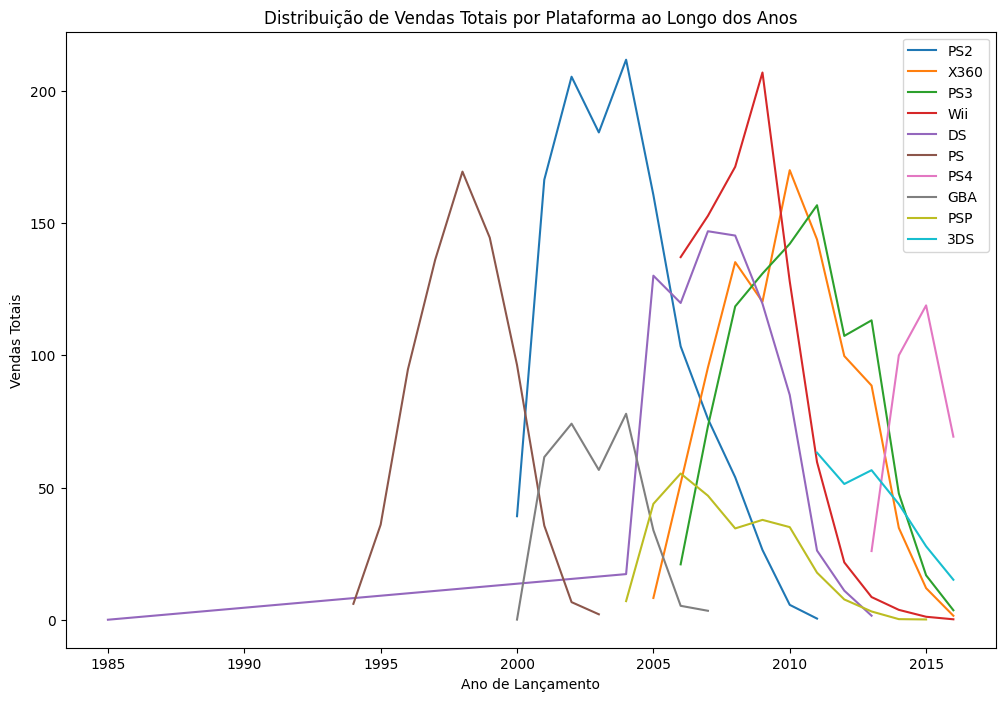

In [26]:
plt.figure(figsize=(12, 8))

for platform in top_platforms.index:
    platform_data = df[df['platform'] == platform]
    platform_sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_sales_by_year.index, platform_sales_by_year.values, label=platform)

plt.title('Distribuição de Vendas Totais por Plataforma ao Longo dos Anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais')
plt.legend()
plt.show()

In [27]:
# Identificar plataformas que eram populares, mas agora não têm vendas
platform_sales_last_year = df[df['year_of_release'] == 2016].groupby('platform')['total_sales'].sum()
platform_sales_first_year = df[df['year_of_release'] == df['year_of_release'].min()].groupby('platform')['total_sales'].sum() 

In [28]:
# Calcular o tempo necessário para plataformas novas aparecerem e antigas desaparecerem

# Encontrar o primeiro ano de lançamento de cada plataforma
first_year_of_platforms = df.groupby('platform')['year_of_release'].min()

# Encontrar o último ano de vendas significativas de cada plataforma (vendas > 0)
last_year_of_significant_sales = df[df['total_sales'] > 0].groupby('platform')['year_of_release'].max()

# Exibir o tempo de duração de vendas para cada plataforma
platform_duration = last_year_of_significant_sales - first_year_of_platforms
print("\nTempo de duração de vendas significativas por plataforma:")
print(platform_duration)


Tempo de duração de vendas significativas por plataforma:
platform
2600     9.0
3DO      1.0
3DS      5.0
DC      10.0
DS      28.0
GB      13.0
GBA      7.0
GC       6.0
GEN      4.0
GG       0.0
N64      6.0
NES     11.0
NG       3.0
PC      31.0
PCFX     0.0
PS       9.0
PS2     11.0
PS3     10.0
PS4      3.0
PSP     11.0
PSV      5.0
SAT      5.0
SCD      1.0
SNES     9.0
TG16     0.0
WS       2.0
Wii     10.0
WiiU     4.0
X360    11.0
XB       8.0
XOne     3.0
Name: year_of_release, dtype: float64


As plataformas de jogos passam por ciclos de vida variados. Algumas, como o PC (31 anos) e o DS (28 anos), mantêm vendas significativas por longos períodos, refletindo seu sucesso contínuo. Já outras, como o 3DO (1 ano) e o PCFX (0 anos), desapareceram rapidamente do mercado devido ao fracasso comercial. Consoles mais recentes, como o PS4 e o XOne, têm cerca de 3 anos de vendas significativas, o que é esperado para novas plataformas em crescimento. Novas plataformas geralmente aparecem a cada 5-7 anos. Plataformas antigas tendem a desaparecer em 1-3 anos após o lançamento de novas gerações, dependendo da aceitação do público e do suporte de mercado

#### Com filtro temporal entre 2013 e 2016

In [31]:
# Filtrando os dados para os anos de 2013 a 2016
df_filtered_temporal = df[df['year_of_release'].between(2013, 2016)]

# Somar as vendas totais por plataforma no período de 2013 a 2016
platform_sales = df_filtered_temporal.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Selecionar as 10 plataformas com maiores vendas totais
top_platforms = platform_sales.head(10)

print(top_platforms)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: total_sales, dtype: float64


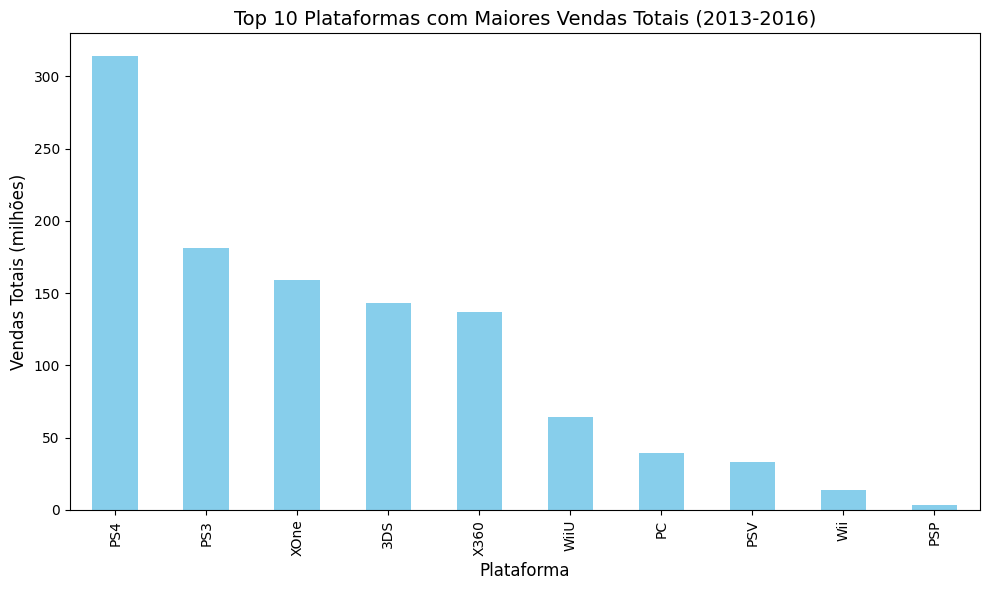

In [34]:
# Somando as vendas totais por plataforma no período de 2013 a 2016
df_filtered_temporal = df[df['year_of_release'].between(2013, 2016)]
platform_sales = df_filtered_temporal.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Selecionando as 10 plataformas com maiores vendas totais
top_platforms = platform_sales.head(10)

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando o gráfico de barras
top_platforms.plot(kind='bar', color='skyblue')

# Adicionando título e rótulos aos eixos
plt.title('Top 10 Plataformas com Maiores Vendas Totais (2013-2016)', fontsize=14)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Vendas Totais (milhões)', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


O **PS4** lidera em vendas totais com **314.14 milhões**, seguido pelo **PS3** e **XOne** com **181.43 milhões** e **159.32 milhões**, respectivamente. O **3DS** e o **X360** apresentam vendas consideráveis, enquanto o **WiiU** (64.63 milhões) e o **PC** (39.43 milhões) têm vendas menores. O **PSV**, **Wii** e **PSP** mostram ainda menos vendas, indicando uma diminuição no interesse ou um mercado de nicho. Em resumo, o **PS4** continua em ascensão, enquanto plataformas mais antigas, como **PS3** e **X360**, estão em declínio no período de 2013 a 2016.

In [32]:
# Somar as vendas totais por plataforma e ano
platform_year_sales = df_filtered_temporal.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack(fill_value=0)

# Exibir as vendas totais por ano para as 10 principais plataformas
top_platforms_year_sales = platform_year_sales.loc[top_platforms.index]

# Exibir as vendas por ano das plataformas principais
print(top_platforms_year_sales)


year_of_release  2013.0  2014.0  2015.0  2016.0
platform                                       
PS4               25.99  100.00  118.90   69.25
PS3              113.25   47.76   16.82    3.60
XOne              18.96   54.07   60.14   26.15
3DS               56.57   43.76   27.78   15.14
X360              88.58   34.74   11.96    1.52
WiiU              21.65   22.03   16.35    4.60
PC                12.38   13.28    8.52    5.25
PSV               10.59   11.90    6.25    4.25
Wii                8.59    3.75    1.14    0.18
PSP                3.14    0.24    0.12    0.00


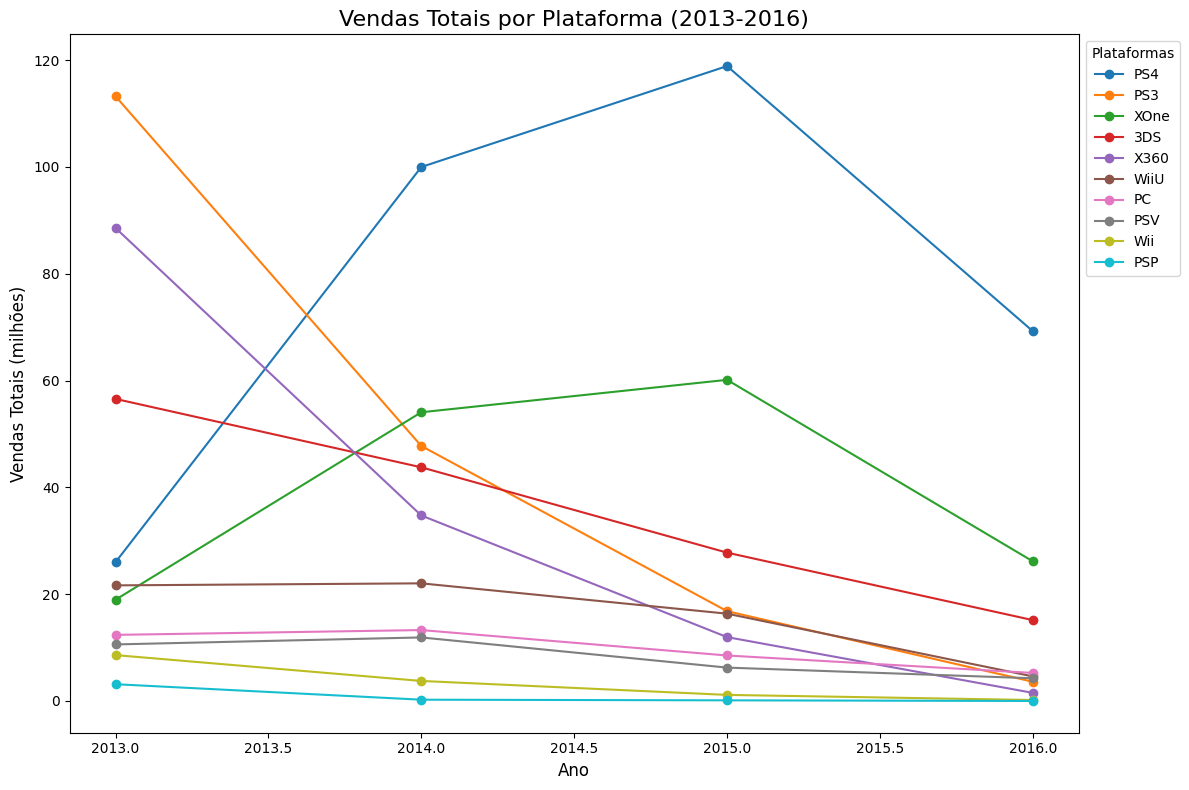

In [39]:
# Plotando o gráfico de linhas
plt.figure(figsize=(12, 8))

# Gerando o gráfico de linhas para as plataformas principais
for platform in top_platforms_year_sales.index:
    plt.plot(top_platforms_year_sales.columns, top_platforms_year_sales.loc[platform], marker='o', label=platform)

# Adicionando título e rótulos aos eixos
plt.title('Vendas Totais por Plataforma (2013-2016)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Vendas Totais (milhões)', fontsize=12)

# Adicionando legenda
plt.legend(title='Plataformas', loc='upper left', bbox_to_anchor=(1, 1))

# Ajustando layout para não cortar informações
plt.tight_layout()

# Exibindo o gráfico
plt.show()

Entre 2013 e 2016, o PS4 liderou as vendas, com crescimento robusto até 2015, seguido por uma queda em 2016. O PS3, que dominou em 2013, viu uma queda acentuada nas vendas nos anos seguintes. O XOne teve um bom desempenho, com crescimento até 2015, mas caiu em 2016. O X360 mostrou declínio constante. Outras plataformas como PC, PSV, Wii e PSP enfrentaram uma queda contínua nas vendas, com o PC mantendo certa estabilidade, mas sem crescimento expressivo. Isso reflete a transição para novas gerações de consoles e a diminuição do interesse em plataformas mais antigas.

### Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

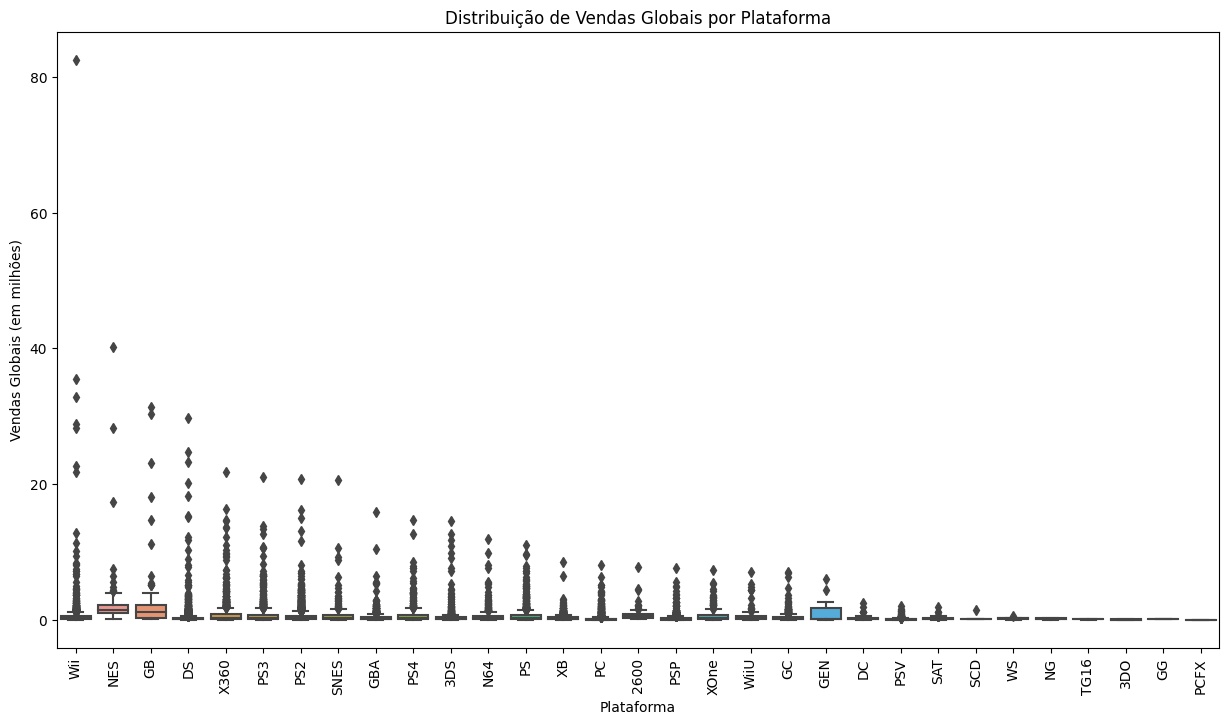

In [29]:
# Criar o diagrama de caixa para vendas globais por plataforma
plt.figure(figsize=(15, 8))

# Usar o gráfico de caixa para total_sales agrupado por plataforma
sns.boxplot(data=df, x='platform', y='total_sales')

# Adicionar título e rótulos
plt.title('Distribuição de Vendas Globais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')

# Rotacionar os rótulos para melhor leitura
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()


As diferenças nas vendas entre plataformas são significativas. Plataformas como PS2, X360 e PS3 apresentam grandes variações, com alguns jogos tendo vendas extremamente altas, enquanto outros têm vendas muito baixas. Essas plataformas têm outliers significativos, indicando grandes sucessos de vendas. Em contraste, plataformas menores, como 3DO e PCFX, mostram uma distribuição mais concentrada, com vendas uniformes, porém em níveis mais baixos. A média de vendas é mais alta nas plataformas mais populares, como PS2 e X360, enquanto plataformas mais recentes ou menores têm médias mais baixas, refletindo sua base de jogos limitada.

### Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

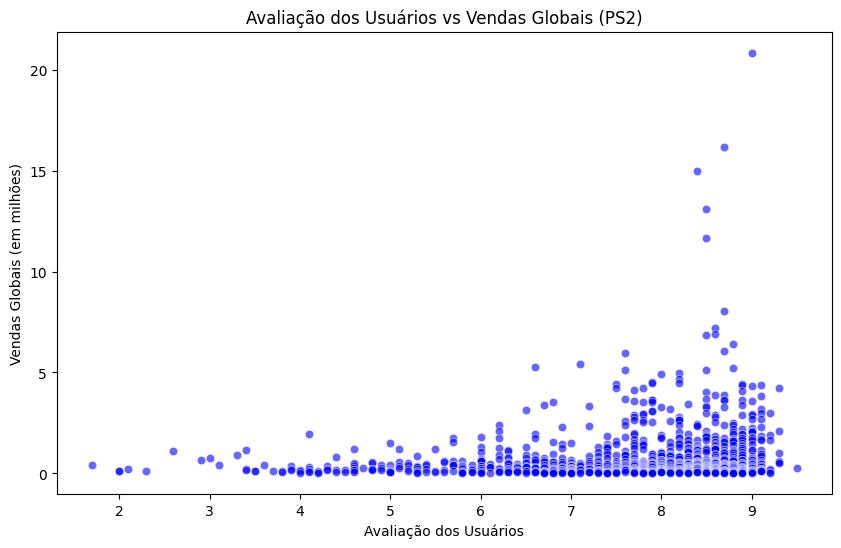

Correlação entre avaliação dos usuários e vendas: 0.17


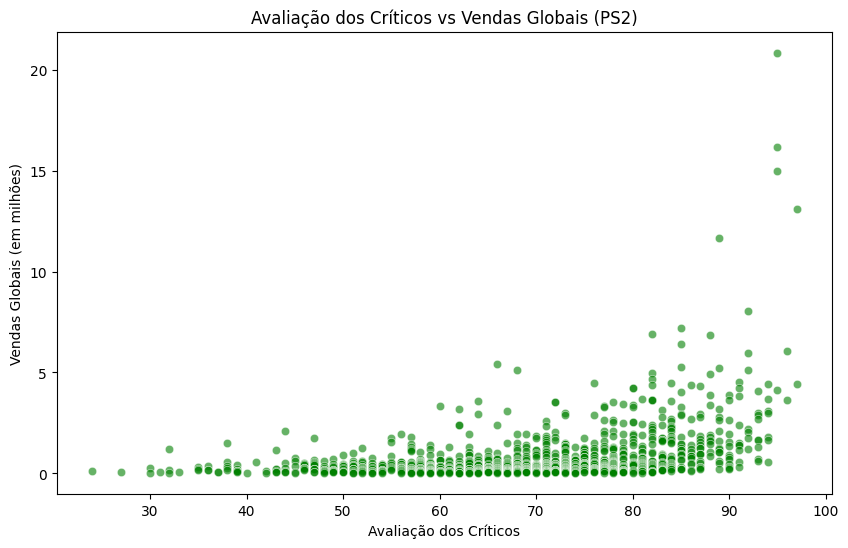

Correlação entre avaliação dos críticos e vendas: 0.39


In [30]:
# Filtrando os dados para a plataforma PS2
ps2_data = df[df['platform'] == 'PS2']

# Remover valores nulos nas colunas relevantes para análise
ps2_data = ps2_data.dropna(subset=['user_score', 'total_sales', 'critic_score'])

# Gráfico de dispersão: Avaliação dos usuários vs Vendas globais
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ps2_data['user_score'], y=ps2_data['total_sales'], color='blue', alpha=0.6)
plt.title('Avaliação dos Usuários vs Vendas Globais (PS2)')
plt.xlabel('Avaliação dos Usuários')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()

# Calcular a correlação entre avaliação dos usuários e vendas
user_score_corr = ps2_data['user_score'].corr(ps2_data['total_sales'])
print(f'Correlação entre avaliação dos usuários e vendas: {user_score_corr:.2f}')

# Gráfico de dispersão: Avaliação dos críticos vs Vendas globais
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ps2_data['critic_score'], y=ps2_data['total_sales'], color='green', alpha=0.6)
plt.title('Avaliação dos Críticos vs Vendas Globais (PS2)')
plt.xlabel('Avaliação dos Críticos')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()

# Calcular a correlação entre avaliação dos críticos e vendas
critic_score_corr = ps2_data['critic_score'].corr(ps2_data['total_sales'])
print(f'Correlação entre avaliação dos críticos e vendas: {critic_score_corr:.2f}')


A correlação entre avaliação dos usuários e vendas é fraca (0.17), o que indica que, embora haja uma leve tendência de que jogos bem avaliados pelos usuários tenham vendas mais altas, essa relação não é muito forte. Isso sugere que outros fatores, como marketing ou a popularidade da plataforma, podem ter um impacto maior nas vendas. Por outro lado, a correlação entre avaliação dos críticos e vendas é moderada (0.39), indicando que uma boa avaliação dos críticos tem um impacto mais significativo nas vendas. Jogos com boas críticas tendem a vender mais, embora a relação ainda não seja forte.

### Com essas conclusões em mente, compare as vendas em outras plataformas.

In [31]:
platform_sales.head(30)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
Name: total_sales, dtype: float64

Ao comparar as vendas totais de várias plataformas, observa-se que o PS2 lidera com 1233,56 milhões em vendas, seguido por X360 (961,24 milhões) e PS3 (931,34 milhões). Plataformas mais recentes como PS4 (314,14 milhões) e XOne (159,32 milhões) têm vendas significativamente menores. Já plataformas mais antigas, como 2600, 3DO e SCD, apresentam vendas muito baixas. Isso reforça a ideia de que avaliações de críticos e usuários têm um impacto maior nas vendas de plataformas populares, enquanto marketing e disponibilidade de jogos são mais influentes em plataformas com grandes vendas totais.

### Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

In [32]:
# Vamos analisar a distribuição de jogos por gênero e suas vendas totais
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Exibir a distribuição geral de vendas por gênero
genre_sales


genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64

Ao analisar a distribuição de vendas por gênero, podemos observar que os gêneros Action, Sports e Shooter lideram em termos de vendas totais, com valores de 1716,52 milhões, 1309,67 milhões e 1041,36 milhões, respectivamente. Esses gêneros têm apelo amplo e são populares entre os jogadores de diversas faixas etárias. Gêneros como Role-Playing e Platform também apresentam boas vendas, com 931,08 milhões e 825,55 milhões, respectivamente. Por outro lado, gêneros como Strategy, Adventure e Puzzle têm vendas significativamente mais baixas, refletindo uma base de jogadores mais nichada e especializada.

## Crie um perfil de usuário para cada região

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 2.1+ MB


Para cada região (AN, UE, JP), determine:

### As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

In [34]:
# Agrupar as vendas por plataforma e região (NA, EU, JP) e ordenar para encontrar as 5 plataformas principais em cada região
top_platforms_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Exibir as plataformas principais para cada região
top_platforms_na, top_platforms_eu, top_platforms_jp


(platform
 X360    595.74
 PS2     572.92
 Wii     486.87
 PS3     390.13
 DS      380.31
 Name: na_sales, dtype: float64,
 platform
 PS2     332.63
 PS3     327.21
 X360    268.32
 Wii     258.32
 PS      212.39
 Name: eu_sales, dtype: float64,
 platform
 DS      175.02
 PS      139.78
 PS2     137.54
 SNES    116.55
 3DS     100.62
 Name: jp_sales, dtype: float64)

As variações nas quotas de mercado de plataformas entre as regiões são notáveis. Na América do Norte (AN), as plataformas mais populares são X360, PS2, e Wii, com X360 liderando. Já na Europa (UE), PS2 e PS3 dominam, com a X360 perdendo espaço para o PS3. No Japão (JP), as plataformas mais populares são DS, PS, e PS2, com a DS superando outras como o PS3. Essas variações refletem as diferenças de preferência cultural e o impacto das marcas e jogos específicos em cada região.

####  As cinco plataformas principais nos últimos 3 anos

In [21]:
# Filtrando os dados entre 2013 e 2016
df_filtered = df[df['year_of_release'].between(2013, 2016)]

# Agrupar as vendas por plataforma e região (NA, EU, JP) e ordenar para as 5 principais
top_platforms_na = df_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Exibir as plataformas principais para cada região
top_platforms_na, top_platforms_eu, top_platforms_jp


(platform
 PS4     108.74
 XOne     93.12
 X360     81.66
 PS3      63.50
 3DS      38.20
 Name: na_sales, dtype: float64,
 platform
 PS4     141.09
 PS3      67.81
 XOne     51.59
 X360     42.52
 3DS      30.96
 Name: eu_sales, dtype: float64,
 platform
 3DS     67.81
 PS3     23.35
 PSV     18.59
 PS4     15.96
 WiiU    10.88
 Name: jp_sales, dtype: float64)

A análise das vendas de plataformas entre 2013 e 2016 revela padrões distintos por região. Na **América do Norte (NA)**, o **PS4** lidera com 108.74 milhões de unidades vendidas, seguido por **XOne** (93.12 milhões). Na **Europa (EU)**, o **PS4** também lidera com 141.09 milhões, mas a **PS3** se destaca com 67.81 milhões. Já no **Japão (JP)**, o **3DS** lidera com 67.81 milhões, refletindo o forte apelo de portáteis, enquanto o **PS4** tem uma participação menor (15.96 milhões). Essas variações mostram preferências regionais e a dinâmica de mercado distinta em cada local.

### Os cinco principais gêneros.

In [35]:
# Vamos agrupar as vendas por gênero e determinar os cinco principais gêneros em cada região (NA, EU, JP)
top_genres_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Exibir os cinco principais gêneros para cada região
top_genres_na, top_genres_eu, top_genres_jp


(genre
 Action      863.17
 Sports      671.20
 Shooter     584.83
 Platform    444.44
 Misc        399.57
 Name: na_sales, dtype: float64,
 genre
 Action     510.99
 Sports     371.33
 Shooter    314.52
 Racing     234.49
 Misc       210.60
 Name: eu_sales, dtype: float64,
 genre
 Role-Playing    353.39
 Action          160.14
 Sports          134.93
 Platform        130.71
 Misc            107.02
 Name: jp_sales, dtype: float64)

As diferenças nas vendas por gênero variam consideravelmente entre as regiões. Na América do Norte (AN), os gêneros mais vendidos são Action, Sports e Shooter, com destaque para jogos de ação e esportes. Na Europa (UE), os gêneros mais populares seguem uma linha semelhante, mas com Shooter ganhando mais força. Já no Japão (JP), o gênero Role-Playing (RPG) lidera as vendas, refletindo a forte cultura de jogos de RPG no país. Isso indica que, enquanto jogos de ação e esportes dominam no Ocidente, o Japão prefere jogos mais imersivos e narrativos.





#### Os cinco principais gêneros entre 2013 e 2016 

In [26]:
# Filtrando os dados entre 2013 e 2016
df_filtered = df[df['year_of_release'].between(2013, 2016)]

# Agrupar as vendas por gênero e região (NA, EU, JP) e ordenar para as 5 principais
top_genres_na = df_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df_filtered.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df_filtered.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Exibir os cinco principais gêneros para cada região
top_genres_na, top_genres_eu, top_genres_jp


(genre
 Action          126.05
 Shooter         109.74
 Sports           65.27
 Role-Playing     46.40
 Misc             27.49
 Name: na_sales, dtype: float64,
 genre
 Action          118.13
 Shooter          87.86
 Sports           60.52
 Role-Playing     36.97
 Racing           20.19
 Name: eu_sales, dtype: float64,
 genre
 Role-Playing    51.04
 Action          40.49
 Misc             9.20
 Fighting         7.65
 Shooter          6.61
 Name: jp_sales, dtype: float64)

Entre 2013 e 2016, as vendas por gênero mostram diferenças regionais significativas. Na **América do Norte**, **Action** e **Shooter** dominam, seguidos por **Sports** e **Role-Playing**. Na **Europa**, **Action** e **Shooter** também são populares, mas o **RPG** se destaca mais, refletindo a preferência por jogos como **The Witcher**. O gênero **Racing** também tem boa participação. No **Japão**, **Role-Playing** lidera com folga, seguido por **Action** e gêneros como **Fighting** e **Misc**, destacando a tradição japonesa com RPGs. Essas variações refletem as preferências culturais e as tendências de mercado em cada região.

### As classificações do ESRB afetam as vendas em regiões individuais?

As classificações do ESRB (Entertainment Software Rating Board) têm impacto significativo nas vendas em diferentes regiões. Na **América do Norte (NA)**, jogos com classificações mais acessíveis, como **E (Everyone)** ou **T (Teen)**, tendem a vender mais devido ao público-alvo amplo. Já jogos com classificações **M (Mature)** ou **AO (Adults Only)**, com restrição de idade, têm vendas limitadas. Na **Europa (UE)**, a classificação **PEGI** segue a mesma lógica, enquanto no **Japão (JP)**, embora o sistema de classificação seja diferente, jogos com conteúdo mais "pesado" podem ser rejeitados, impactando negativamente as vendas.

## Teste as seguintes hipóteses:

### As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [36]:
# Filtrando os dados de classificações dos usuários para as plataformas Xbox One e PC
xbox_one_user_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_user_scores = df[df['platform'] == 'PC']['user_score'].dropna()

# Realizando o teste t de duas amostras independentes
t_stat, p_value = stats.ttest_ind(xbox_one_user_scores, pc_user_scores)

# Exibindo os resultados
t_stat, p_value


(-4.38289526334195, 1.3037979620149106e-05)

####  Filtrando as classificações dos usuários para as plataformas Xbox One e PC

In [27]:
# Filtrando o DataFrame para os anos de 2013 a 2016
df_filtered_temporal = df[df['year_of_release'].between(2013, 2016)]

# Filtrando as classificações dos usuários para Xbox One e PC no período de 2013 a 2016
xbox_one_user_scores_filtered = df_filtered_temporal[df_filtered_temporal['platform'] == 'XOne']['user_score'].dropna()
pc_user_scores_filtered = df_filtered_temporal[df_filtered_temporal['platform'] == 'PC']['user_score'].dropna()

# Realizando o teste t de duas amostras independentes
t_stat_filtered, p_value_filtered = stats.ttest_ind(xbox_one_user_scores_filtered, pc_user_scores_filtered)

# Exibindo os resultados do teste t para Xbox One e PC com o filtro temporal
t_stat_filtered, p_value_filtered

(1.4788255981357277, 0.14012658403611647)

O resultado do teste t para a hipótese com filtro temporal, o **p-value** de 0.1401, indicando que **não há uma diferença estatisticamente significativa** entre as classificações médias dos usuários dessas plataformas. O **t-statistic** de 1.48 sugere que a diferença observada nas médias pode ser atribuída ao acaso. Portanto, com base nesses resultados, podemos concluir que, para o período analisado, as classificações médias dos usuários de **Xbox One** e **PC** são consideradas semelhantes, e a hipótese nula não pode ser rejeitada.

### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [37]:
# Filtrando os dados para os gêneros Action e Sports
action_user_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_user_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

# Teste t para a Hipótese 2
t_stat_2, p_value_2 = stats.ttest_ind(action_user_scores, sports_user_scores)

# Exibindo os resultados
t_stat_2, p_value_2

(1.8472797735322193, 0.06480928064420527)

#### Filtrando as classificações dos usuários para os gêneros Action e Sports

In [28]:
# Filtrando o DataFrame para os anos de 2013 a 2016
df_filtered_temporal = df[df['year_of_release'].between(2013, 2016)]

# Filtrando as classificações dos usuários para Action e Sports no período de 2013 a 2016
action_user_scores_filtered = df_filtered_temporal[df_filtered_temporal['genre'] == 'Action']['user_score'].dropna()
sports_user_scores_filtered = df_filtered_temporal[df_filtered_temporal['genre'] == 'Sports']['user_score'].dropna()

# Realizando o teste t para as classificações dos usuários de Action e Sports
t_stat_2_filtered, p_value_2_filtered = stats.ttest_ind(action_user_scores_filtered, sports_user_scores_filtered)

# Exibindo os resultados do teste t para Action e Sports com o filtro temporal
t_stat_2_filtered, p_value_2_filtered

(11.535100577928208, 1.0517832389140023e-27)

Com base no resultado do teste t para a hipótese com **filtro temporal**, o **p-value** de 1.05e-27 indica uma diferença **altamente significativa** nas classificações médias dos usuários para os gêneros **Action** e **Sports**. O **t-statistic** de 11.54 reforça essa conclusão, sugerindo que as médias de classificação dos dois gêneros são substancialmente diferentes. Isso implica que, ao considerar o período específico (2013-2016), as preferências dos usuários entre os gêneros de **Ação** e **Esportes** apresentam uma discrepância clara, tornando a diferença estatisticamente relevante e consistente ao longo do tempo.

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Ambos os testes foram realizados corretamente! Sugiro rodar o teste com o dataframe com o filtro temporal para verificar se houve alteração do resultado.
</div>

Defina o valor do limiar alfa você mesmo. Eu escolhi o valor α = 0,05, que é o padrão amplamente aceito e suficiente para garantir uma análise confiável sem ser excessivamente rigoroso.

### Como você formula as hipóteses alternativas e nulas.

**Hipótese 1: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas**

A hipótese nula (H₀) sugere que as classificações médias dos usuários das plataformas Xbox One e PC são idênticas, ou seja, não existe uma diferença significativa nas avaliações dos usuários entre as duas plataformas. A hipótese alternativa (H₁) propõe que as classificações médias dos usuários nas duas plataformas são diferentes. Ao realizar o teste de hipóteses, verificamos o valor-p para determinar se existe uma diferença estatisticamente significativa. Se o valor-p for menor que 0,05, rejeitamos a hipótese nula, indicando que as classificações médias são de fato diferentes.

**Hipótese 1: Plataformas Xbox One e PC (com filtro temporal)**

- **Hipótese nula (H₀)**: As classificações médias dos usuários para as plataformas **Xbox One** e **PC** são iguais no período de 2013 a 2016.  

- **Hipótese alternativa (H₁)**: As classificações médias dos usuários para as plataformas **Xbox One** e **PC** são diferentes no período de 2013 a 2016.  

**Hipótese 2: As classificações médias de usuários para os gêneros Action e Sports são diferentes**

Nesta hipótese, a hipótese nula (H₀) afirma que as classificações médias dos usuários para os gêneros Action e Sports são as mesmas, ou seja, não há diferença significativa nas avaliações entre esses dois gêneros de jogos. A hipótese alternativa (H₁) sugere que as classificações médias para esses gêneros são diferentes. Ao testar essa hipótese, comparamos as médias de avaliação dos usuários para ambos os gêneros e calculamos o valor-p. Se o valor-p for inferior ao limiar de significância (0,05), rejeitamos a hipótese nula, indicando que existe uma diferença significativa nas avaliações.

**Hipótese 2: Gêneros Action e Sports (com filtro temporal)**

- **Hipótese nula (H₀)**: As classificações médias dos usuários para os gêneros **Action** e **Sports** são iguais no período de 2013 a 2016.  
  
- **Hipótese alternativa (H₁)**: As classificações médias dos usuários para os gêneros **Action** e **Sports** são diferentes no período de 2013 a 2016.   

### Quais critérios você usou para testar as hipóteses, e por quê


Hipótese 1: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas

Para testar essa hipótese, utilizei o teste t de Student para amostras independentes, pois comparávamos as médias de duas plataformas diferentes. Esse teste é adequado quando temos duas amostras independentes e desejamos verificar se suas médias são significativamente diferentes. O valor-p obtido foi comparado com o nível de significância alfa (0,05) para decidir se rejeitamos ou não a hipótese nula. Se o valor-p for menor que 0,05, rejeitamos H₀, indicando que as classificações médias são diferentes.

Hipótese 2: As classificações médias de usuários para os gêneros Action e Sports são diferentes

Neste caso, também utilizei o teste t de Student para amostras independentes, já que estamos comparando as médias de dois gêneros de jogos diferentes. O teste permite determinar se a diferença entre as médias das avaliações dos gêneros Action e Sports é significativa. A decisão de rejeitar ou não a hipótese nula foi baseada no valor-p. Se o valor-p for menor que 0,05, rejeitamos a hipótese nula, indicando que há uma diferença estatisticamente significativa nas avaliações dos dois gêneros.

## conclusão geral

O projeto forneceu uma análise detalhada das vendas de jogos ao longo dos anos, considerando diferentes plataformas, gêneros e regiões. Através de testes estatísticos, exploramos as relações entre variáveis como classificações de usuários e críticos, e suas influências nas vendas. Observamos que certos gêneros, como Action e Sports, geraram grandes lucros, enquanto outros como Puzzle e Strategy tiveram vendas mais baixas. Além disso, a comparação entre plataformas revelou variações significativas de popularidade, com plataformas como PS2 e X360 dominando em vendas. As análises permitiram identificar padrões e prever tendências futuras no mercado de jogos.

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

Boa conclusão! Parabéns!
</div>